<a href="https://colab.research.google.com/github/weihanchen/google-colab-python-toturial/blob/main/jupyter-examples/goodinfo_yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 抓取指定顯示依據頁籤
這次我們要瞄準的目標是「股利發放年度」的殖利率數據，因此會切換入口的位置進行抓取。

## 參數
- STOCK_ID: 股票代號


## 步驟
- 請求目標網址。
- 設定編碼為`utf-8`。
- 設定header避免被誤以為是機器人請求。
- 印出資訊。


## 注意事項
- Goodinfo為了防止機器人，因此會對於非瀏覽器的請求進行Reject， 假設我們沒有設定header的狀況之下會吐出以下的訊息。
```
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">請勿透過網站內容下載軟體查詢本網站
```
  - 通常阻檔爬蟲的方式都是檢查標頭內的User Agent，此時我們只要模擬瀏覽器的User Agent即可進行操作。

- 這次使用的方法為POST。



In [4]:
import requests

stockId='3231'

headers = {
  'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
}
res = requests.get('https://goodinfo.tw/tw/StockDividendPolicy.asp?STOCK_ID={0}'.format(stockId), headers = headers)
res.encoding = 'utf-8'
res.text

'\r\n<!doctype html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html lang="zh-Hant">\r\n<head>\r\n\r\n<meta charset="UTF-8">\r\n<meta name="viewport" content="width=device-width">\r\n<meta name="description" content="(3231) 緯創 歷年股票股利,現金股利,董監酬勞,員工紅利分派一覽表">\r\n<title>(3231) 緯創 歷年股利/股息分配一覽表 - Goodinfo!台灣股市資訊網</title>\r\n\r\n<link rel="canonical" href="https://goodinfo.tw/tw/StockDividendPolicy.asp?STOCK_ID=3231&SHOW_ROTC="/>\r\n<link rel="icon" href="image/Goodinfo.ico">\r\n<link rel="stylesheet" type="text/css" href="../Library/css/Standard.css?44410.7508101852"/>\r\n<link rel="stylesheet" type="text/css" href="../Library/css/Public.css?44873.0647685185"/>\r\n\r\n<script type="text/javascript" charset="utf-8" src="Lib.js/Initial.asp"></script>\r\n<script type="text/javascript" charset="utf-8" src="Lib.js/Utility.asp"></script>\r\n<script type="text/javascript" charset="utf-8" src="Lib.js/Cookie.asp"></script>\r\n<script t

# 使用BeautifulSoap進行解析
## 目標
- 框出「成交價」區段： 抓出今日成交價。
- 框出「股利政策」區段： 統計近幾年最高/最低股利與股價。

## 步驟
- 分析抓取的html區塊目標: 使用Network工具。
- 引入套件。
- 宣告解析器。
- 抓取select選項。
- 框出


In [5]:
from bs4 import BeautifulSoup

bs = BeautifulSoup(res.text, 'html.parser')

# 這一段是「股利政策」的區塊
dividend_data = bs.select_one('#tblDetail')

print(dividend_data)

<table class="b1 p4_0 r0_10 row_mouse_over" id="tblDetail" style="width:100%;font-size:10pt;line-height:17px;"><tr class="bg_h2 fw_normal" style="text-align:center;"> <th colspan="12"><nobr><b>股　　利　　政　　策</b></nobr></th> <th colspan="7" rowspan="2"><nobr><b>殖  利  率  統  計</b></nobr></th> <th colspan="5" rowspan="2"><nobr><b>盈餘分配率統計</b></nobr></th></tr><tr class="bg_h2 fw_normal" style="text-align:center;"> <th rowspan="3"><nobr><b>股利<br/>發放<br/>年度</b></nobr></th> <th colspan="7"><nobr>股東股利 (元/股)</nobr></th> <th colspan="2" title="股東股利總計"><nobr>股利總計</nobr></th> <th rowspan="3"><nobr>填息<br/>花費<br/>日數</nobr></th> <th rowspan="3"><nobr>填權<br/>花費<br/>日數</nobr></th></tr><tr class="bg_h2 fw_normal" style="text-align:center;"> <th colspan="3"><nobr>現金股利</nobr></th> <th colspan="3"><nobr>股票股利</nobr></th> <th rowspan="2"><nobr>股利<br/>合計</nobr></th> <th rowspan="2"><nobr>現金<br/>(億)</nobr></th> <th rowspan="2"><nobr>股票<br/><span style="font-size:8pt;line-height:10px;">(千張)</span></nobr></th> <th row

# 使用Pandas進行資料分析
## 步驟
- 引入套件。
- 剖析html。
- 取到正確的節點: 這邊僅能不斷的試誤，先設法統計幾個節點，再印出某個節點查看是否為我們需要的資訊。
- 過濾標題。
- 過濾欄。
- 型態轉換。
- 欄位統計。

## Columns(列)的數據
```
Index(['股利  發放  年度', '盈餘', '公積', '合計', '盈餘', '公積', '合計', '股利  合計', '現金  (億)',
       '股票  (千張)', '填息  花費  日數', '填權  花費  日數', '股價  年度', '最高', '最低', '年均',
       '現金', '股票', '合計', '股利  所屬  期間', 'EPS  (元)', '配息', '配股', '合計'],
      dtype='object')
```

## 重點筆記

```
# 顯示有哪些欄位
node.columns

# 顯示Columns(列)為名稱的數據
node[['名稱']] 

# 取得指定「列」的標題
node.columns.get_level_values(3)

# 將指定欄資料集轉換型態以利統計
node['欄位名稱'].astype('float')

# 取平均
node['欄位名稱'].mean()
```

## 資源參考
- [金融理財入門(股票篇) — 基本面名詞](https://www.potatomedia.co/s/bXdkrdvG)
- [【股市韭菜系列】明年股息推算，以「xx」為例](https://www.potatomedia.co/s/hlGfSzx)

In [6]:
import pandas
import datetime



dfs = pandas.read_html(dividend_data.prettify())
node = dfs[0]

# 這邊我們將標題僅留下第3列即可
node.columns = node.columns.get_level_values(3)

# 印出Columns輔助以下抓取重要資訊
# node.columns

# 顯示Columns(列)為名稱的數據
# 這次抓取的目標有4個欄位，分別以下：
node = node[['股利  發放  年度', '股利  合計', '最高', '最低']] 

# node = node[node['最高'].apply(lambda x: str(x).isdigit())] # 刪除非數字的列
node = node.head()

# 把 str 轉成 float 型態才能進行統計
node['股利  合計'] = node['股利  合計'].astype('float')
node['最低'] = node['最低'].astype('float')
node['最高'] = node['最高'].astype('float') 


dividend = node['股利  合計'].mean()
highest = node['最高'].mean()
lowest = node['最低'].mean()

print('{0} {1} {2}'.format(dividend, highest, lowest))

# 由於股價越低，殖利率越高的特性，因此會以股利除以最低價
hYield = dividend / lowest


# 由於股價越高，殖利率越低的特性， 因此會以股利除以最高價
lYield = dividend / highest

# 這邊已知的資訊有目前股價，而未知的資訊則是發放股利，因此我們可以設法由最近四季去推估未來可能的股利，進而得到目前殖利率的指標， 最終依據最高與最低殖利率決定買進時間點
# 注意： 以下並非真實資料，僅以示範為主
# 假設目前股價為27.5
# 平均股利: 1.8782
cYield = dividend / 27.5

print('最高殖利率={0:.2%}, 最低殖利率={1:.2%}, 目前殖利率={2:.2%}'.format(hYield, lYield, cYield))





1.8782 32.87 20.740000000000002
最高殖利率=9.06%, 最低殖利率=5.71%, 目前殖利率=6.83%


# 繪製目前殖利率位階圖
- 以N年平均最高與最低殖利率作為上下限。
- 對照目前的殖利率位階。
- 殖利率越高代表目前CP值越高。





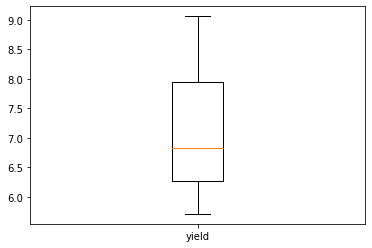

In [2]:
import matplotlib.pyplot as plt

data = [5.71,6.83,9.06]

labels = ['yield']

plt.boxplot(data, labels=labels)
plt.show()

# 繪製目前股價位階圖
- 以N年平均最高股價與最低股價作為上下限。
- 對照目前股價位階。
- 股價越低代表價格越迷人。

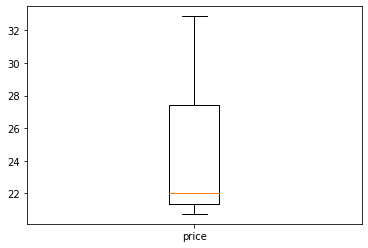

In [3]:
import matplotlib.pyplot as plt

data = [20.74,22,32.87]

labels = ['price']

plt.boxplot(data, labels=labels)
plt.show()